In [1]:
import numpy as np
import pandas as pd
#from google.colab import files

# Fazer o upload do arquivo CSV
#uploaded = files.upload()

# Nome do arquivo enviado
#nome_arquivo = list(uploaded.keys())[0] # dados_01

In [2]:
# Dados tratados na primeira fase de preparação
df = pd.read_csv('../data/prepared_data.csv')

In [3]:
# Número de linhas e colunas
df.shape

(5719, 15)

In [4]:
# Primeiros elementos
df.head(1000)

,CR,RF,RF-CAT,SEXO,IDA-MÉD,TC,NC,TO,ME,TURNO,TC-NC-TO,NC-ME,NC-TURNO,ANO,AE
0,AMA,NaN,ND,M,47.0,TÉC,PES,SUB,P,VES,TÉC-PES-SUB,PES-P,PES-VES,2017,SIM
1,BRA,0.5,"0,5",F,17.0,FIC,MFC,CON,P,NOT,FIC-MFC-CON,MFC-P,MFC-NOT,2017,NÃO
2,BRA,0.5,"0,5",F,17.0,TÉC,GT,SUB,P,VES,TÉC-GT-SUB,GT-P,GT-VES,2017,NÃO
3,BRA,0.5,"0,5",F,17.0,TÉC,SJ,SUB,P,VES,TÉC-SJ-SUB,SJ-P,SJ-VES,2017,NÃO
4,BRA,0.5,"0,5",F,17.0,TÉC,SJ,SUB,P,VES,TÉC-SJ-SUB,SJ-P,SJ-VES,2017,NÃO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,BRA,0.5,"0,5",F,47.0,TÉC,TI,SUB,P,NOT,TÉC-TI-SUB,TI-P,TI-NOT,2019,NÃO
996,BRA,0.5,"0,5",M,17.0,TÉC,SJ,INT,P,INT,TÉC-SJ-INT,SJ-P,SJ-INT,2019,NÃO
997,BRA,0.5,"0,5",M,17.0,TÉC,SJ,INT,P,INT,TÉC-SJ-INT,SJ-P,SJ-INT,2019,NÃO
998,BRA,0.5,"0,5",M,22.0,FIC,DES,NSA,P,VES,FIC-DES-NSA,DES-P,DES-VES,2019,SIM


In [5]:
# Transformações necessárias para a exploração
# Converte True para 1 e False para 0
df['AE'] = df['AE'].map({"SIM":1,"NÃO":0})
df.head(100)

,CR,RF,RF-CAT,SEXO,IDA-MÉD,TC,NC,TO,ME,TURNO,TC-NC-TO,NC-ME,NC-TURNO,ANO,AE
0,AMA,NaN,ND,M,47.0,TÉC,PES,SUB,P,VES,TÉC-PES-SUB,PES-P,PES-VES,2017,1
1,BRA,0.5,"0,5",F,17.0,FIC,MFC,CON,P,NOT,FIC-MFC-CON,MFC-P,MFC-NOT,2017,0
2,BRA,0.5,"0,5",F,17.0,TÉC,GT,SUB,P,VES,TÉC-GT-SUB,GT-P,GT-VES,2017,0
3,BRA,0.5,"0,5",F,17.0,TÉC,SJ,SUB,P,VES,TÉC-SJ-SUB,SJ-P,SJ-VES,2017,0
4,BRA,0.5,"0,5",F,17.0,TÉC,SJ,SUB,P,VES,TÉC-SJ-SUB,SJ-P,SJ-VES,2017,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,BRA,NaN,ND,M,27.0,TÉC,SJ,SUB,P,NOT,TÉC-SJ-SUB,SJ-P,SJ-NOT,2017,1
96,BRA,NaN,ND,M,27.0,TÉC,SJ,SUB,P,NOT,TÉC-SJ-SUB,SJ-P,SJ-NOT,2017,1
97,BRA,NaN,ND,M,27.0,TÉC,TA,SUB,P,NOT,TÉC-TA-SUB,TA-P,TA-NOT,2017,1
98,BRA,NaN,ND,M,27.0,TÉC,TA,SUB,P,NOT,TÉC-TA-SUB,TA-P,TA-NOT,2017,1


In [6]:
pip install sweetviz


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


d:\Dropbox\Documentos\IFPB\Pesquisa\Taxa de Evasão\Dropout Rate Project\dropout_rate_project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Feature: IDA-MÉD                             |███▌      | [ 35%]   00:00 -> (00:01 left)

AttributeError: module 'numpy' has no attribute 'VisibleDeprecationWarning'

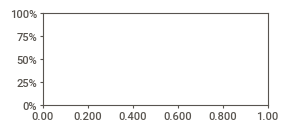

In [7]:
import sweetviz as sv

# Criar uma cópia categórica apenas para análise
df['AE_str'] = df['AE'].astype(str)

# Configuração personalizada para garantir que "AE_str" não seja agrupada como "Other"
custom_cfg = sv.FeatureConfig(force_cat=['AE_str'])

# Executar a análise mantendo "AE" como variável alvo
aed_sv = sv.analyze(df, target_feat='AE', feat_cfg=custom_cfg)

# Salvar o relatório HTML
aed_sv.show_html('eda_sv_int.html')


In [ ]:
# from google.colab import files

# Faz o download do arquivo HTML
# files.download('eda_sv_int.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
pip install ydata-profiling

  Using cached numpy-2.1.3-cp311-cp311-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.1.3-cp311-cp311-win_amd64.whl (12.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.3
    Uninstalling numpy-2.2.3:
      Successfully uninstalled numpy-2.2.3
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dropout-rate-project 0.1.0 requires numpy<3.0.0,>=2.2.3, but you have numpy 2.1.3 which is incompatible.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
# Instale o pacote em seu ambiente virtual com "pip install pandas_profiling".
import ydata_profiling

# Executa Data Profiling
aed_ydp = df.profile_report()

# Salva o arquivo HTML final com o relatório
aed_ydp.to_file(output_file="eda_ydp.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 35.81it/s]


In [ ]:
# from google.colab import files

# Faz o download do arquivo HTML
# files.download('eda_ydp.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
import pandas as pd
import numpy as np
import scipy.stats as stats

def cramers_v(x, y):
    """Calcula a correlação de Cramer entre duas variáveis categóricas."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(r - 1, k - 1))

def categorical_corr_matrix(df):
    """Gera uma matriz de correlação para variáveis categóricas usando Cramér's V."""
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    corr_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols, dtype=float)

    for col1 in cat_cols:
        for col2 in cat_cols:
            if col1 == col2:
                corr_matrix.loc[col1, col2] = 1.0
            else:
                corr_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

    return corr_matrix

# Exemplo de uso
corr_matrix = categorical_corr_matrix(df)
print(corr_matrix)


                                       CR    RF-CAT      SEXO        TC  \
CR                               1.000000  0.125569  0.127943  0.150179   
RF-CAT                           0.125569  1.000000  0.092373  0.303725   
SEXO                             0.127943  0.092373  1.000000  0.053210   
TC                               0.150179  0.303725  0.053210  1.000000   
NC                               0.267961  0.219903  0.334878  1.000000   
TO                               0.186726  0.184451  0.144252  0.717662   
ME                               0.118293  0.173386  0.068692  0.612697   
TURNO                            0.083653  0.144224  0.123584  0.470120   
TC-NC-TO                         0.293726  0.234655  0.347719  1.000000   
NC-ME                            0.271925  0.223189  0.348627  1.000000   
NC-TURNO                         0.299761  0.244292  0.358312  1.000000   
TC_NC_TO_ME_TURNO                0.305544  0.247373  0.370776  1.000000   
TC_NC_TO_ME              

In [8]:
df["TC_NC_TO_ME_TURNO"] = df[["TC", "NC", "TO", "ME", "TURNO"]].astype(str).agg("-".join, axis=1)
df["TC_NC_TO_ME"] = df[["TC", "NC", "TO", "ME"]].astype(str).agg("-".join, axis=1)
df["TC_NC_TO_TURNO"] = df[["TC", "NC", "TO", "TURNO"]].astype(str).agg("-".join, axis=1)
df["SEXO_TC_NC_TO_ME_TURNO"] = df[["SEXO","TC", "NC", "TO", "ME", "TURNO"]].astype(str).agg("-".join, axis=1)
df["CR_SEXO_TC_NC_TO_ME_TURNO"] = df[["CR","SEXO","TC", "NC", "TO", "ME", "TURNO"]].astype(str).agg("-".join, axis=1)
df["CR_RF_SEXO_TC_NC_TO_ME_TURNO"] = df[["CR","RF","SEXO","TC", "NC", "TO", "ME", "TURNO"]].astype(str).agg("-".join, axis=1)
df["RF_SEXO_TC_NC_TO_ME_TURNO"] = df[["RF","SEXO","TC", "NC", "TO", "ME", "TURNO"]].astype(str).agg("-".join, axis=1)
df["CR_RFCAT_SEXO_TC_NC_TO_ME_TURNO"] = df[["CR","RF-CAT","SEXO","TC", "NC", "TO", "ME", "TURNO"]].astype(str).agg("-".join, axis=1)


In [13]:
result = df.groupby(['ANO', 'AE']).size().unstack(fill_value=0)
print(result)



AE      0    1
ANO           
2017  289  208
2018  318  152
2019  426  157
2020  995   97
2021  775  581
2022  536  371
2023  572  242
